## **Описание проекта: оценка рисков невозврата кредита**

В вашем распоряжении данные клиентов банка «Скрудж», которые планируют взять кредит. Вам необходимо выяснить, что из имеющихся данных влияет на своевременное погашение кредита и каким именно образом.

Исследование поможет в создании модели кредитного скоринга — системы для оценки способности потенциального заёмщика погасить свой кредит.

По каждому клиенту есть информация о его семейном положении, образовании, доходе и другие данные. Вам предстоит подготовить данные к анализу и исследовать их, в процессе отвечая на вопросы.

### Цель работы
- Провести анализ анализ данных клиентов банка «Скрудж»;
- Исследоватать определённые факторы, влияющие на своевременную оплату кредита, и сделать общие выводы;
- Проверить две исследовательские гипотезы.
### План работы

- Изучить общую информацию о датафрейме;
- Выполнить предобработку данных;
- Провести исследовательский анализ данных;
- Проверить гипотезы;
- Составить выводы исследования.
### Описание данных

- `children` — количество детей в семье;
- `days_employed` — сколько дней работает клиент;
- `dob_years` — возраст клиента;
- `education` — уровень образования клиента;
- `education_id` — идентификатор образования клиента;
- `family_status` — семейное положение клиента;
- `family_status_id` — идентификатор семейного положения клиента;
- `gender` — пол клиента;
- `income_type` — тип дохода клиента;
- `debt` — был ли у клиента когда-либо просрочен платёж по кредиту;
- `total_income` — ежемесячный доход;
- `purpose` — причина оформления кредита.




## Шаг 1. Общая информация





In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_raw = pd.read_csv('/datasets/credit_scoring_eng.csv')
print(df_raw.head())

   children  days_employed  dob_years            education  education_id  \
0         1   -8437.673028         42    bachelor's degree             0   
1         1   -4024.803754         36  secondary education             1   
2         0   -5623.422610         33  Secondary Education             1   
3         3   -4124.747207         32  secondary education             1   
4         0  340266.072047         53  secondary education             1   

       family_status  family_status_id gender income_type  debt  total_income  \
0            married                 0      F    employee     0     40620.102   
1            married                 0      F    employee     0     17932.802   
2            married                 0      M    employee     0     23341.752   
3            married                 0      M    employee     0     42820.568   
4  civil partnership                 1      F     retiree     0     25378.572   

                   purpose  
0    purchase of the house 

In [382]:
df = df_raw.copy()

In [383]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB
None


Датафрейм содержит 21525 срок и 12 столбцов. Данные представлены в трёх типах: int, float, object. Заметно, что стоолбцы dob_years и total_income содержат пропуски.


## Шаг 2. Предобработка данных



In [384]:
print(df.isna().sum())

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64


В полученном датафрейме только два столбца days_employed и total_income содержат пропуски

In [385]:
print(df.isna().mean().apply(lambda x: f'{x:.1%}')) 

children             0.0%
days_employed       10.1%
dob_years            0.0%
education            0.0%
education_id         0.0%
family_status        0.0%
family_status_id     0.0%
gender               0.0%
income_type          0.0%
debt                 0.0%
total_income        10.1%
purpose              0.0%
dtype: object


In [386]:
print(df['days_employed'])

0         -8437.673028
1         -4024.803754
2         -5623.422610
3         -4124.747207
4        340266.072047
             ...      
21520     -4529.316663
21521    343937.404131
21522     -2113.346888
21523     -3112.481705
21524     -1984.507589
Name: days_employed, Length: 21525, dtype: float64


Пропуски составляют 10% от общего количества, что довольно много. 
Следовательно, если просто их удалить, потеряется большой объём данных. Логичнее заменить пропуски на 0, так пропуск будет означать , что клиент ещё не работал.

In [387]:
df.fillna(0, inplace=True)
print(df[['days_employed', 'total_income']])
print(df.isna().mean().apply(lambda x: f'{x:.1%}')) 

       days_employed  total_income
0       -8437.673028     40620.102
1       -4024.803754     17932.802
2       -5623.422610     23341.752
3       -4124.747207     42820.568
4      340266.072047     25378.572
...              ...           ...
21520   -4529.316663     35966.698
21521  343937.404131     24959.969
21522   -2113.346888     14347.610
21523   -3112.481705     39054.888
21524   -1984.507589     13127.587

[21525 rows x 2 columns]
children            0.0%
days_employed       0.0%
dob_years           0.0%
education           0.0%
education_id        0.0%
family_status       0.0%
family_status_id    0.0%
gender              0.0%
income_type         0.0%
debt                0.0%
total_income        0.0%
purpose             0.0%
dtype: object


Помимо этого, столбец days_employed имеет много отрицательных значений. Это можно трактовать по разному: отрицательное значение может указывать на то, что клиент ещё не работал, либо на то, что это ошибка в данных, и минусов там быть не должно. 


1. Изучим уникальные значения в столбцах с уровнем образования (`education`) и полом клиента (`gender`). 
2. Устраним неявные дубликаты и некорректные значения.



In [388]:
print(df['education'].unique(), df['gender'].unique())

["bachelor's degree" 'secondary education' 'Secondary Education'
 'SECONDARY EDUCATION' "BACHELOR'S DEGREE" 'some college'
 'primary education' "Bachelor's Degree" 'SOME COLLEGE' 'Some College'
 'PRIMARY EDUCATION' 'Primary Education' 'Graduate Degree'
 'GRADUATE DEGREE' 'graduate degree'] ['F' 'M' 'XNA']


In [389]:
df['education'] = df['education'].str.lower()
print(df['education'].unique())

["bachelor's degree" 'secondary education' 'some college'
 'primary education' 'graduate degree']


Проверим наличие дубликатов.

In [390]:
print(df[df.duplicated()])

       children  days_employed  dob_years            education  education_id  \
2849          0            0.0         41  secondary education             1   
3290          0            0.0         58  secondary education             1   
4182          1            0.0         34    bachelor's degree             0   
4851          0            0.0         60  secondary education             1   
5557          0            0.0         58  secondary education             1   
...         ...            ...        ...                  ...           ...   
20702         0            0.0         64  secondary education             1   
21032         0            0.0         60  secondary education             1   
21132         0            0.0         47  secondary education             1   
21281         1            0.0         30    bachelor's degree             0   
21415         0            0.0         54  secondary education             1   

           family_status  family_status

Это явные дубликаты, их можно удалить из датафрейма

In [391]:
df = df.drop_duplicates()


## Шаг 3. Выбросы и аномальные значения

Изучите столбцы `total_income`, `dob_age`, `chidlren` на наличие выбросов и аномальных значений, в том числе при помощи графиков. Если выбросы или аномалии будут обнаружены — обоснованно примите решение об их судьбе. Используйте подзаголовки третьего уровня (`### Подзаголовок`), чтобы создать структуру действий в рамках этого шага.



In [392]:
print(df[['total_income', 'dob_years', 'children']].describe())

        total_income     dob_years      children
count   21454.000000  21454.000000  21454.000000
mean    24161.752365     43.271231      0.539946
std     17557.873237     12.570822      1.383444
min         0.000000      0.000000     -1.000000
25%     14254.247000     33.000000      0.000000
50%     21724.967000     42.000000      0.000000
75%     31330.237250     53.000000      1.000000
max    362496.645000     75.000000     20.000000


В столбцах уже видны аномально высокие максимальные значения. Помимо этого, в столбце children, отвечающим за количество детей заметно минимальное значение, равное -1, что явно является ошибкой в данных. Посмотрим данные на графиках. 

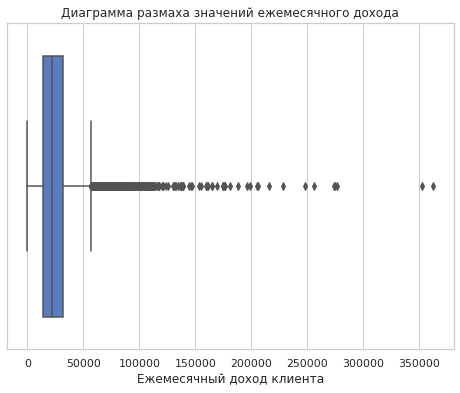

In [393]:
plt.figure(figsize = (8,6))
sns.set(style="whitegrid", palette="muted")
sns.boxplot(data = df, x = 'total_income')
plt.title('Диаграмма размаха значений ежемесячного дохода')
plt.xlabel('Ежемесячный доход клиента')
plt.show()

По графику видно, что есть глобальные выбросы с высокими значениями стоимости. При этом левая граница диаграммы размаха находится в районе нуля.

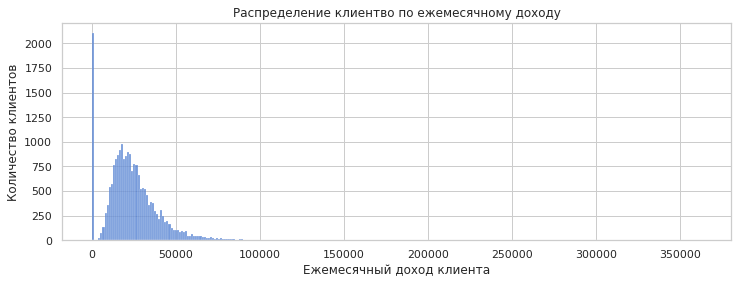

In [394]:
plt.figure(figsize = (12, 4))
sns.set(style="whitegrid", palette="muted")
sns.histplot(data = df, x = 'total_income')
plt.title('Распределение клиентво по ежемесячному доходу')
plt.ylabel('Количество клиентов')
plt.xlabel('Ежемесячный доход клиента')
plt.show()

На гистограмме наблюдается пик нулевых значений. 

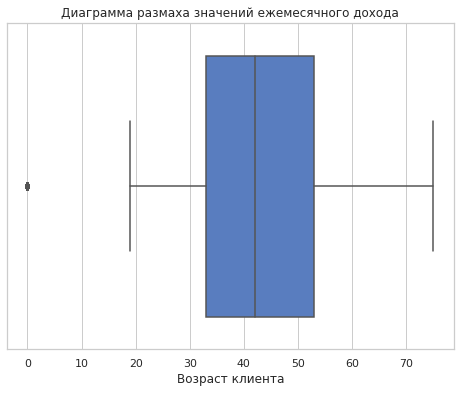

In [395]:
sns.set(style="whitegrid", palette="muted")
plt.figure(figsize = (8, 6))
sns.boxplot(data = df, x = 'dob_years')
plt.title('Диаграмма размаха значений ежемесячного дохода')
plt.xlabel('Возраст клиента')
plt.show()

На графике видно аномальное значение 0, что явно является ошибкой в данных. В остальном данные корректные: средний возраст клиентов банка чуть больше 40 лет, выбросов нет.

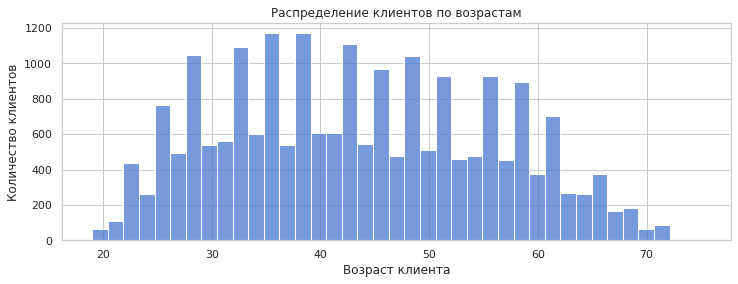

In [396]:
sns.set(style="whitegrid", palette="muted")
plt.figure(figsize = (12, 4))
sns.histplot(data = df.query('dob_years > 0'), x = 'dob_years')
plt.title('Распределение клиентов по возрастам')
plt.ylabel('Количество клиентов')
plt.xlabel('Возраст клиента')
plt.show()

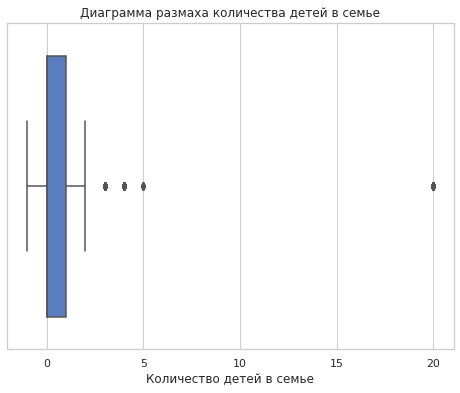

In [397]:
sns.set(style="whitegrid", palette="muted")
plt.figure(figsize = (8,6))
sns.boxplot(data = df, x = 'children')
plt.title('Диаграмма размаха количества детей в семье')
plt.xlabel('Количество детей в семье')
plt.show()

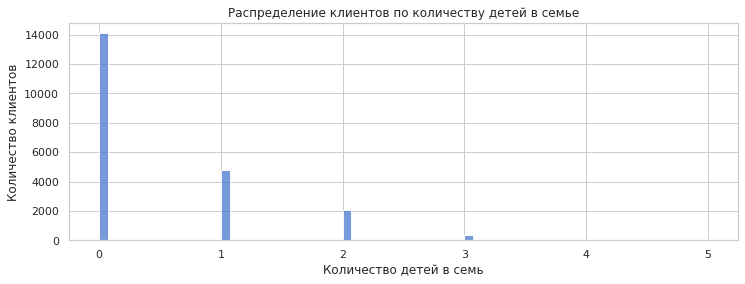

In [398]:
sns.set(style="whitegrid", palette="muted")
plt.figure(figsize = (12, 4))
sns.histplot(data = df.query('children >= 0 and children <= 5'), x = 'children')
plt.xlabel('Количество детей в семь')
plt.ylabel('Количество клиентов')
plt.title('Распределение клиентов по количеству детей в семье')
plt.show()

На гистрограмме видно, что преобладают клиенты без детей.

Предлагается отфильтровать аномалии следующим образом: в столбце total_income отфильтровать значения выше 99 перцентиля, в столбце dob_yers нулевые значения, в столбце children отрицательные значения и значения выше 4.

In [399]:
percentile_99 = df['total_income'].quantile(0.99)
query_string = f"dob_years > 0 and children >= 0 and children <= 4 and total_income < {percentile_99}"
df = df.query(query_string)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21007 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21007 non-null  int64  
 1   days_employed     21007 non-null  float64
 2   dob_years         21007 non-null  int64  
 3   education         21007 non-null  object 
 4   education_id      21007 non-null  int64  
 5   family_status     21007 non-null  object 
 6   family_status_id  21007 non-null  int64  
 7   gender            21007 non-null  object 
 8   income_type       21007 non-null  object 
 9   debt              21007 non-null  int64  
 10  total_income      21007 non-null  float64
 11  purpose           21007 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.1+ MB



## Шаг 4. Разделение клиентов




**Разделим клиентов на 5 категорий по уровню дохода:**
- Без дохода — люди без работы и с нулевым доходом.
- Очень низкий доход — люди, получающие ниже 14 процентиля от общего распределения дохода.
- Низкий доход — люди, получающие между 14 и 34 процентилями от общего распределения дохода.
- Средний доход — люди, получающие между 34 и 78 процентилями от общего распределения дохода.
- Высокий доход — люди, получающие больше 78 процентиля от общего распределения дохода.



In [400]:
quantile_14 = df['total_income'].quantile(0.14)
quantile_34 = df['total_income'].quantile(0.34)
quantile_78 = df['total_income'].quantile(0.78)

def income(total_income, q_14=quantile_14, q_34=quantile_34, q_78=quantile_78):
    if total_income < 0:
        return 'error'
    elif total_income == 0:
        return 'Без дохода'
    elif total_income < q_14:
        return 'Очень низкий доход'
    elif total_income < q_34 and total_income >= q_14:
        return 'Низкий доход'
    elif total_income < q_78 and total_income >= q_34:
        return 'Средний доход'
    elif total_income >= q_78:
        return 'Высокий доход'
df['total_income_category'] = df['total_income'].apply(income)
print(df[['total_income', 'total_income_category']].head(10))

   total_income total_income_category
0     40620.102         Высокий доход
1     17932.802         Средний доход
2     23341.752         Средний доход
3     42820.568         Высокий доход
4     25378.572         Средний доход
5     40922.170         Высокий доход
6     38484.156         Высокий доход
7     21731.829         Средний доход
8     15337.093          Низкий доход
9     23108.150         Средний доход


Разделим клиентов на две категории по возрасту: до 40 лет и после.

In [401]:
def age(dob_years):
    if dob_years < 0:
        return 'error'
    elif dob_years < 40:
        return 'возраст до 40'
    elif dob_years >= 40:
        return 'возраст после 40'
df['age_category'] = df['dob_years'].apply(age)
print(df[['dob_years', 'age_category']].head(10))

   dob_years      age_category
0         42  возраст после 40
1         36     возраст до 40
2         33     возраст до 40
3         32     возраст до 40
4         53  возраст после 40
5         27     возраст до 40
6         43  возраст после 40
7         50  возраст после 40
8         35     возраст до 40
9         41  возраст после 40


Разделим клиентов на несколько категорий по количеству детей: без детей, от одного до двух, от трёх и больше. 

In [402]:
def children_count(children): 
    if children < 0:
        return 'error'
    elif children == 0:
        return 'без детей'
    elif children > 0 and children <= 2:
        return 'от одного до двух'
    elif children > 2:
        return 'от трех и больше'
df['children_category'] = df['children'].apply(children_count)
print(df[['children', 'children_category']].head(10))

   children  children_category
0         1  от одного до двух
1         1  от одного до двух
2         0          без детей
3         3   от трех и больше
4         0          без детей
5         0          без детей
6         0          без детей
7         0          без детей
8         2  от одного до двух
9         0          без детей


## Шаг 5. Исследовательский анализ данных

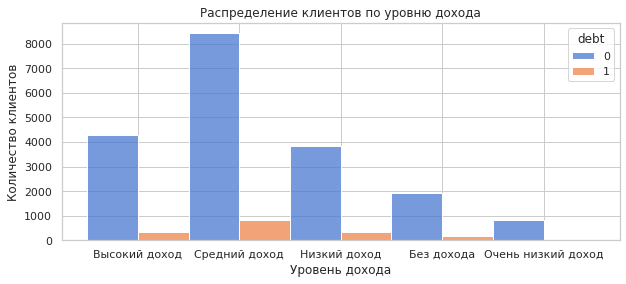

                           debt
total_income_category          
Без дохода             0.081731
Высокий доход          0.070749
Низкий доход           0.082342
Очень низкий доход     0.062718
Средний доход          0.087968


In [403]:
sns.set(style="whitegrid", palette="muted")
plt.figure(figsize = (10, 4))
sns.histplot(data = df, x = 'total_income_category', hue = 'debt', multiple='dodge')
plt.title('Распределение клиентов по уровню дохода')
plt.xlabel('Уровень дохода')
plt.ylabel('Количество клиентов')
plt.show()
print(df.pivot_table(index = 'total_income_category', values = 'debt', aggfunc = 'mean'))

Из таблицы видно, что клиенты со средним доходом имеют наибольший процент просрочек по кредиту. Довольно противоречивым кажется тот факт, что наболее низкий уровень просрочек по кредиту имеют клиенты с очень низким доходом. 

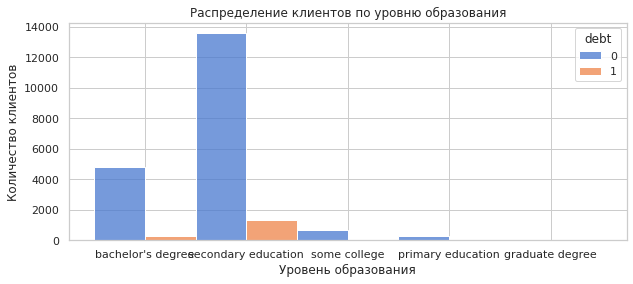

                         debt
education                    
bachelor's degree    0.053225
graduate degree      0.000000
primary education    0.110320
secondary education  0.090045
some college         0.089163


In [404]:
sns.set(style="whitegrid", palette="muted")
plt.figure(figsize = (10, 4))
sns.histplot(data = df, x = 'education', hue = 'debt', multiple='dodge')
plt.title('Распределение клиентов по уровню образования')
plt.xlabel('Уровень образования')
plt.ylabel('Количество клиентов')
plt.show()
print(df.pivot_table(index = 'education', values = 'debt', aggfunc = 'mean'))

Из таблицы видно, что клиенты со степенью магистра (graduate degree) не имеют должников, что указывает на очень высокую финансовую дисциплину в этой группе. Наивысшая доля должников наблюдается у клиентов с начальным образованием — 11.03%. Это может свидетельствовать о низкой финансовой грамотности и ограниченных возможностях для получения хорошего дохода, что ведет к увеличению риска задолженности

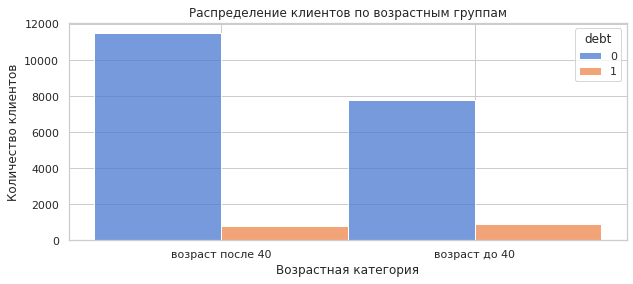

                      debt
age_category              
возраст до 40     0.102623
возраст после 40  0.066423


In [405]:
sns.set(style="whitegrid", palette="muted")
plt.figure(figsize = (10, 4))
sns.histplot(data = df, x = 'age_category', hue = 'debt', multiple='dodge')
plt.title('Распределение клиентов по возрастным группам')
plt.ylabel('Количество клиентов')
plt.xlabel('Возрастная категория')
plt.show()
print(df.pivot_table(index = 'age_category', values = 'debt', aggfunc = 'mean'))

Доля должников среди клиентов в возрастной группе после 40 составляет 6.65%, что значительно меньше чем у категории до 40 лет.

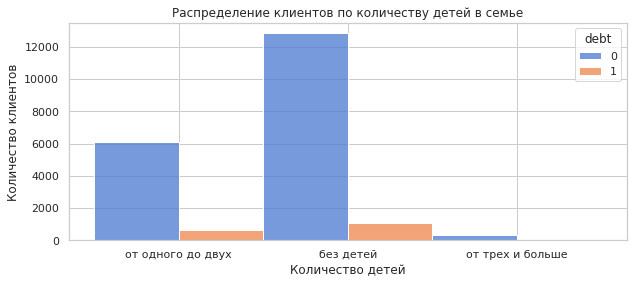

                       debt
children_category          
без детей          0.075506
от одного до двух  0.093320
от трех и больше   0.085399


In [406]:
sns.set(style="whitegrid", palette="muted")
plt.figure(figsize = (10, 4))
sns.histplot(data = df, x = 'children_category', hue = 'debt', multiple='dodge')
plt.title('Распределение клиентов по количеству детей в семье')
plt.ylabel('Количество клиентов')
plt.xlabel('Количество детей')
plt.show()
print(df.pivot_table(index = 'children_category', values = 'debt', aggfunc = 'mean'))

По графикам видно, что распределения между должниками и нет слабо отличаются друг от друга. 

***Проверим исследовательскую гипотезу***: у клиентов с детьми более высокий уровень финансовой ответственности и, следовательно, более низкий риск просрочек по кредиту.

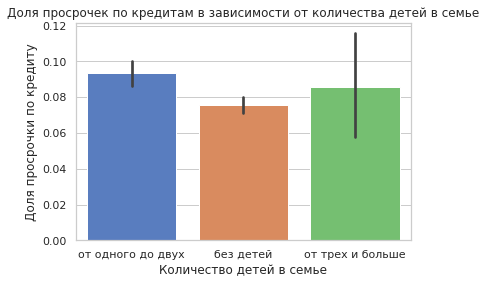

                       debt
children_category          
без детей          0.075506
от одного до двух  0.093320
от трех и больше   0.085399


In [407]:
sns.set(style="whitegrid", palette="muted")
sns.barplot(data=df, x='children_category', y = 'debt')
plt.title('Доля просрочек по кредитам в зависимости от количества детей в семье')
plt.xlabel('Количество детей в семье')
plt.ylabel('Доля просрочки по кредиту')
plt.show()
print(df.pivot_table(index = 'children_category', values = 'debt', aggfunc = 'mean'))

Гипотеза опровергается. Данные показывают обратное: клиенты без детей имеют меньший процент просрочек чем клиенты, у которых есть дети.


***Проверим исследовательскую гипотезу***: одинокие мужчины с низким доходом чаще оказываются должниками, чем семейные мужчины со средним доходом.



Посмотрим для начала, какие значения содержит столбец family_status

In [408]:
print(df['family_status'].unique())

['married' 'civil partnership' 'widow / widower' 'divorced' 'unmarried']


Разделим на две категории: одинокий и семейный

In [409]:
def status(family_status):
    if family_status == 'married' or family_status == 'civil partnership':
        return 'семейный'
    elif family_status == 'widow / widower' or family_status == 'divorced' or family_status == 'unmarried':
        return 'одинокий'
df['family_status_common'] = df['family_status'].apply(status)
print(df[['family_status', 'family_status_common']])

           family_status family_status_common
0                married             семейный
1                married             семейный
2                married             семейный
3                married             семейный
4      civil partnership             семейный
...                  ...                  ...
21520  civil partnership             семейный
21521            married             семейный
21522  civil partnership             семейный
21523            married             семейный
21524            married             семейный

[21007 rows x 2 columns]


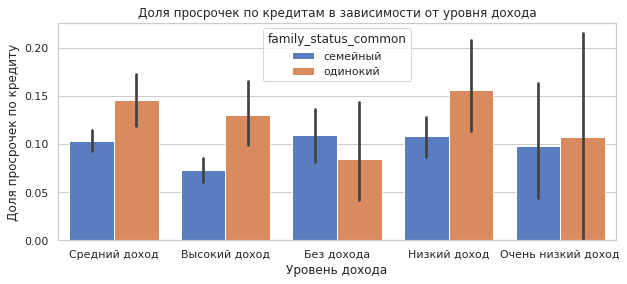

In [410]:
plt.figure(figsize = (10, 4))
sns.set(style="whitegrid", palette="muted")
sns.barplot(data=df.query('gender == "M"'), x='total_income_category', y='debt', hue='family_status_common')
plt.title('Доля просрочек по кредитам в зависимости от уровня дохода')
plt.xlabel('Уровень дохода')
plt.ylabel('Доля просрочек по кредиту')
plt.show()

Гипотеза подтвердилась. Одинокие мужчины с низким доходом чаще оказываются должниками. 


## Шаг 6. Общий вывод



В ходе проведенного исследования были проанализированы различные факторы, влияющие на своевременное погашение кредита клиентами банка «Скрудж».
1. Влияние уровня дохода
Результаты показали, что уровень дохода значимо влияет на финансовую ответственность клиентов. Клиенты с низким доходом и очень низким доходом имеют более высокую долю должников на уровне 8.23% и 6.27% соответственно. Напротив, клиенты с высоким доходом показывают наименьшую долю должников (7.07%), что подтверждает необходимость более тщательной оценки кредитоспособности заемщиков на основе их финансового положения.
2. Образование как индикатор финансовой ответственности
Данные, касающиеся образования клиентов, свидетельствуют о том, что более высокий уровень образования связан с меньшей долей должников. Клиенты с первичным образованием имеют самый высокий уровень задолженности (11.03%), в то время как у выпускников со степнью магистра этот показатель составляет 0%. Это указывает на то, что клиенты с лучше развитой финансовой грамотностью и навыками управления ресурсами менее подвержены финансовым трудностям.
3. Возрастная категория и финансовая дисциплина
Анализ возрастных категорий показал, что заёмщики до 40 лет имеют долю должников на уровне 10.26%, что значительно выше по сравнению с клиентами старше 40 лет (6.64%). Это может указывать на большую финансовую непредсказуемость и недостаток опыта у молодых клиентов. Более зрелые заемщики предпочитают более взвешенные решения и более опытные в управлении своими финансами.
Также были проверены две исследовательские гипотезы. В результате проверки стало понятно, что клиенты без детей имеют меньший процент просрочек по кредиту чем клиенты, у которых есть дети, а также, что одинокие мужчины с низким доходом чаще оказываются должниками чем семейные мужчины со средним доходом. 


## *Шаг 7. Дополнительное исследование



Исследуем причины оформления кредита. Проверим гипотезу, что люди, которые брали кредит на образование, реже всего оказывались должниками.



In [411]:
list_ = df['purpose'].unique()
print(list_)
education_related = [reason for reason in list_ if 'education' in reason]
print(education_related)

['purchase of the house' 'car purchase' 'supplementary education'
 'to have a wedding' 'housing transactions' 'education' 'having a wedding'
 'purchase of the house for my family' 'buy real estate'
 'buy commercial real estate' 'buy residential real estate'
 'construction of own property' 'property' 'building a property'
 'buying a second-hand car' 'buying my own car'
 'transactions with commercial real estate' 'building a real estate'
 'housing' 'transactions with my real estate' 'cars'
 'second-hand car purchase' 'getting an education' 'to become educated'
 'car' 'wedding ceremony' 'to get a supplementary education'
 'purchase of my own house' 'real estate transactions'
 'getting higher education' 'to own a car' 'purchase of a car'
 'profile education' 'university education'
 'buying property for renting out' 'to buy a car' 'housing renovation'
 'going to university']
['supplementary education', 'education', 'getting an education', 'to get a supplementary education', 'getting higher 

In [412]:
def find_education_purpose(purpose):
    education_related = [reason for reason in list_ if 'education' in reason]
    if purpose in education_related:
        return 'Кредит для образования'
    else:
        return 'Кредит для других целей'
df['purpose_category'] = df['purpose'].apply(find_education_purpose)
print(df[['purpose', 'purpose_category']])

                       purpose         purpose_category
0        purchase of the house  Кредит для других целей
1                 car purchase  Кредит для других целей
2        purchase of the house  Кредит для других целей
3      supplementary education   Кредит для образования
4            to have a wedding  Кредит для других целей
...                        ...                      ...
21520     housing transactions  Кредит для других целей
21521        purchase of a car  Кредит для других целей
21522                 property  Кредит для других целей
21523        buying my own car  Кредит для других целей
21524             to buy a car  Кредит для других целей

[21007 rows x 2 columns]


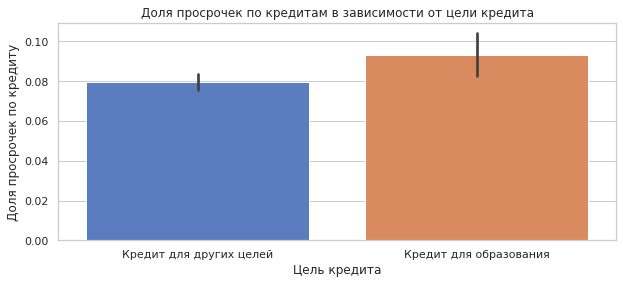

                             debt
purpose_category                 
Кредит для других целей  0.079445
Кредит для образования   0.092939


In [413]:
plt.figure(figsize = (10,4))
sns.barplot(data = df, x = 'purpose_category', y = 'debt')
plt.title('Доля просрочек по кредитам в зависимости от цели кредита')
plt.xlabel('Цель кредита')
plt.ylabel('Доля просрочек по кредиту')
plt.show()
print(df.pivot_table(index = 'purpose_category', values = 'debt', aggfunc = 'mean'))

На графике видно, что доля просрочек по кредиту выше в случае когда кредит брался на образование. Гипотеза не подтвердилась. Это подтверждает и таблица.